In [1]:
from BACKGROUND_PYTHON_SCRIPTS.Functions_DischargeEstimation import *
from BACKGROUND_PYTHON_SCRIPTS.my_functions import *

<div style="background-color: lightblue; padding: 10px 0;">
    <h1 style="text-align: center; font-style: italic; margin: 0;">Bankfull determination</h1>
</div>

</br>
This Python file takes the raw cross profile measurement data (.pos files) and uses this to generate the hydraulic data for the bankfull state of the cross sections. It exports it results to the 'Bankfull' sheet of the ManningLeopold.xlsx Excel file.

<div style="background-color: Lightblue; padding: 10px 0;">
    <h2 style="text-align: center; font-style: italic; margin: 0;">Importing Data</h2>
</div>

In [2]:
input_file = pd.read_excel(f'./ManningLeopold.xlsx', sheet_name='Files')

<div style="background-color: Lightblue; padding: 10px 0;">
    <h2 style="text-align: center; font-style: italic; margin: 0;">Bankfull determination</h2>
</div>

</br>

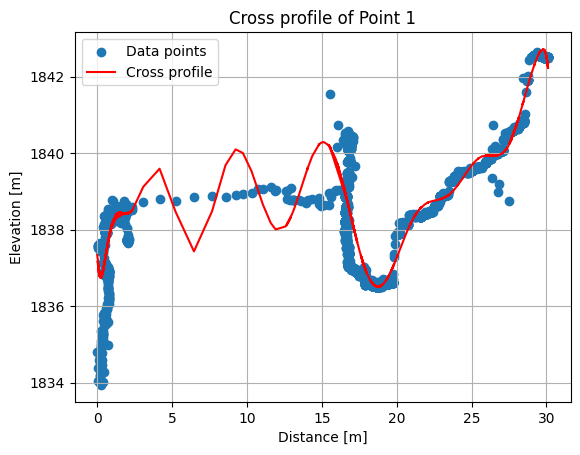

Which side of the cross profile has the lowest bank? (left/right) left


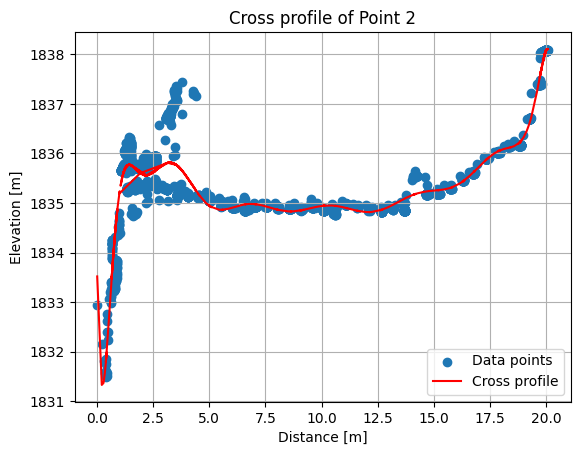

Which side of the cross profile has the lowest bank? (left/right) left


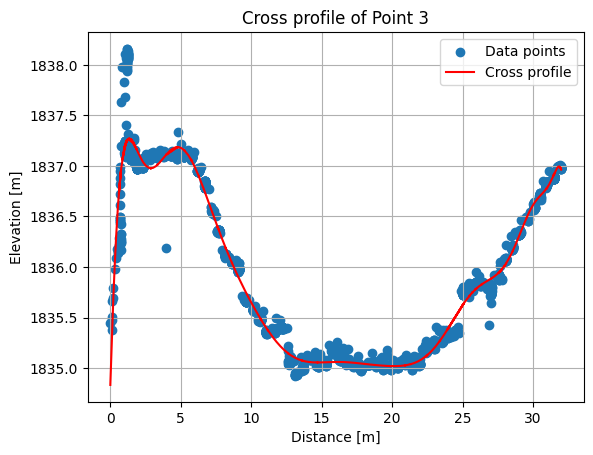

Which side of the cross profile has the lowest bank? (left/right) right


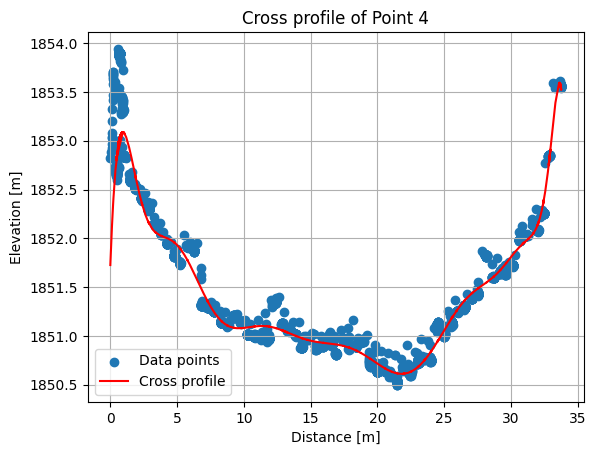

Which side of the cross profile has the lowest bank? (left/right) left


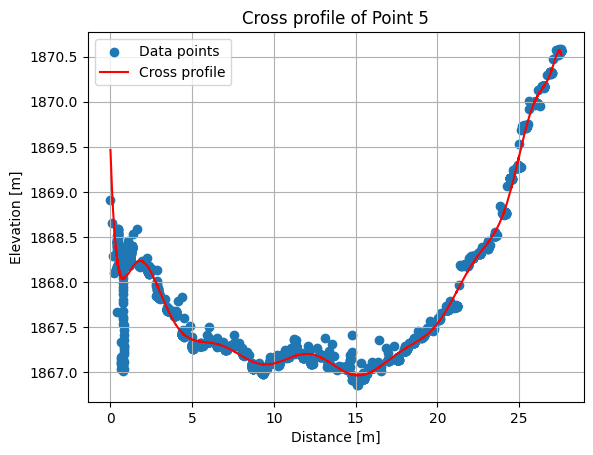

Which side of the cross profile has the lowest bank? (left/right) left


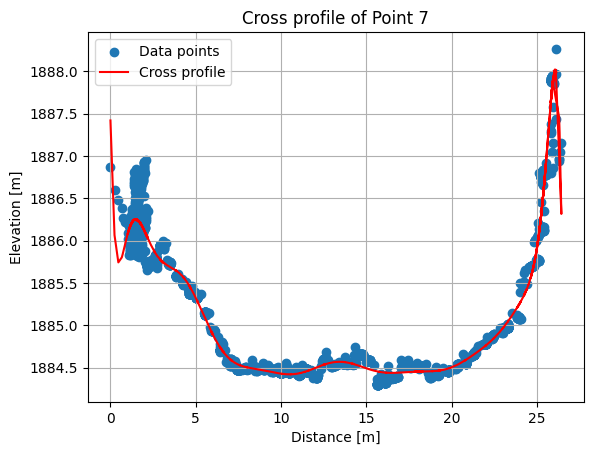

Which side of the cross profile has the lowest bank? (left/right) left


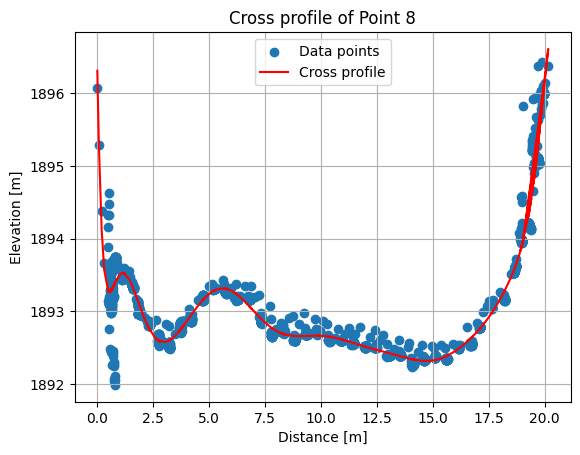

Which side of the cross profile has the lowest bank? (left/right) left


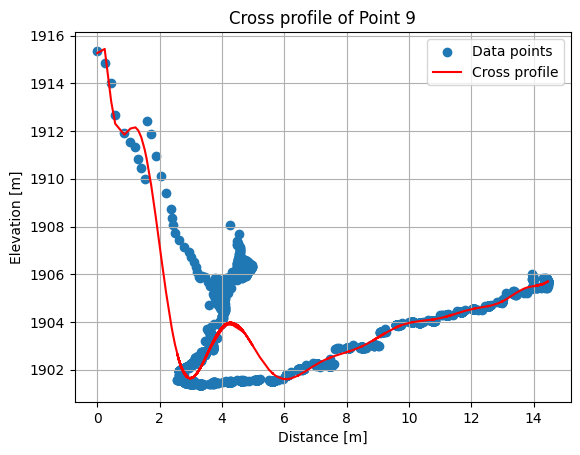

Which side of the cross profile has the lowest bank? (left/right) right


In [5]:
columns = ['pointname', 'waterlevel [m]', 'mean_depth [m]', 'width [m]', 'area [m2]', 'hydraulic_depth [m]', 'hydraulic_radius [m]']
hydraulic_parameters_bf = pd.DataFrame(columns=columns)

for i in range(len(input_file)):
    pointname = input_file['pointname'][i]
    cp_filename = input_file['filename'][i]
    sticklength = input_file['sticklength'][i]
    cp_data = func_read_data(cp_filename, sticklength)
    cp_data['distance(m)'] = func_distance(cp_data['latitude(deg)'], cp_data['longitude(deg)'])
    fitted_values = func_fitline2(cp_data['distance(m)'], cp_data['height(m)'], pointname)
    
    bankfull_side = input('Which side of the cross profile has the lowest bank? (left/right)')
    if bankfull_side == 'left':
        bankfull = fitted_values[0:40].max()
    if bankfull_side == 'right':
        bankfull = fitted_values[-40:-1].max()
    
    hydraulic_parameters = func_hydraulic_parameters(bankfull, fitted_values, cp_data['distance(m)'])
    new_row = {
            'pointname': pointname, 
            'waterlevel [m]': bankfull,
            'mean_depth [m]': hydraulic_parameters[0], 
            'width [m]': hydraulic_parameters[1],
            'area [m2]': hydraulic_parameters[2], 
            'hydraulic_depth [m]': hydraulic_parameters[3], 
            'hydraulic_radius [m]': hydraulic_parameters[4]
            }

    hydraulic_parameters_bf.loc[len(hydraulic_parameters_bf)] = new_row

In [6]:
file_path = './ManningLeopold.xlsx'

with pd.ExcelWriter(file_path, mode='a', engine='openpyxl', if_sheet_exists='overlay') as writer:
    hydraulic_parameters_bf.to_excel(writer, sheet_name='Bankfull', index=False, header=True, startrow=writer.sheets['Bankfull'].max_row)